<a href="https://colab.research.google.com/github/napulen/jupyter_notebooks/blob/master/chrombigram/plotting_chrombigrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Key Estimation using pitch class sets

This is a small experiment using word embeddings with musical information.

The music pieces are encoded as sequences of `pitch class sets`, which are turned into strings.

This is achieved through a library called `chrombigram` that I developed.

The dataset of pieces was pre-computed into sequences of chrombigrams using a different notebook, the resulting strings can be imported to this notebook.

In [50]:
!git clone https://github.com/napulen/jupyter_notebooks/
!pip install --upgrade chrombigram

fatal: destination path 'jupyter_notebooks' already exists and is not an empty directory.


In [5]:
from chrombigram.chrombigram import Chrombigram, ChrombigramCounter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import csv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

An auxiliary function to extract pitch-class sets from a music21 stream

In [0]:
with open('jupyter_notebooks/chrombigram/dataset.csv') as f:
  df = pd.read_csv(f)

In [0]:
key_encodings = {}
keys = [                
  ('C', 0), 
  ('D', 2), 
  ('E', 4),
  ('F', 5),
  ('G', 7),
  ('A', 9),
  ('B', 11),
  ('c', 12), 
  ('d', 14), 
  ('e', 16),
  ('f', 17),
  ('g', 19),
  ('a', 21),
  ('b', 23)  
]

alterations = [
  ('', 0),
  ('#', 1),
  ('x', 2),
  ('##', 2),
  ('b', -1),
  ('bb', -2),
  ('-', -1),
  ('--', -2)
]

for key, label in keys:
  for alt, value in alterations:
    key_encodings[key + alt] = (12 + label + value) % 12
    key_encodings[key + alt] += 12 if label >= 12 else 0

def encode_key_labels(label):
  if label in key_encodings:
    return key_encodings[label]
  else:
    return np.nan

Encode the labels as numbers, and remve the entries with faulty key labels from the dataset

In [0]:
df['label'] = df['label'].map(encode_key_labels)
df = df.dropna()

Let's plot some data

chor086.krn 19.0 ['926', '149', '926', '149', '2B6', '82B', '169', '149', '92B6', '9B6', '1B69', '92B6', '8B4', '149', '926', '2B7', '1467', '147', '926', '82B6', '149', '19', '92B6', '926', '814', '82B4', '149', '926', '2B7', '926', '2B47', '147', '926', '924', '149', '1497', '926', '149', '926', '149', '926', '926', '9246', '926', '9267', '149', '1B49', '149', '1497', '926', '9246', '926', '926', '149', '149', '9367', '936', 'B47', '147', '2B6', '1269', '2B47', '1B47', 'B47', '149', '1497', '926', '2B6', '82B6', '1A6', '1A46', '2B7', 'B47', '169', '2B67', '147', '9246', '926', '2B47', '1B47', 'B47', '149', '1497', '926']
[19, 147, 814, 149, 169, 1A6, 924, 926, 2B6, 2B7, 82B, 936, B47, 8B4, 9B6, 1269, 1467, 1A46, 1497, 1B47, 1B49, 1B69, 9246, 2B47, 82B4, 9267, 2B67, 82B6, 92B6, 9367]


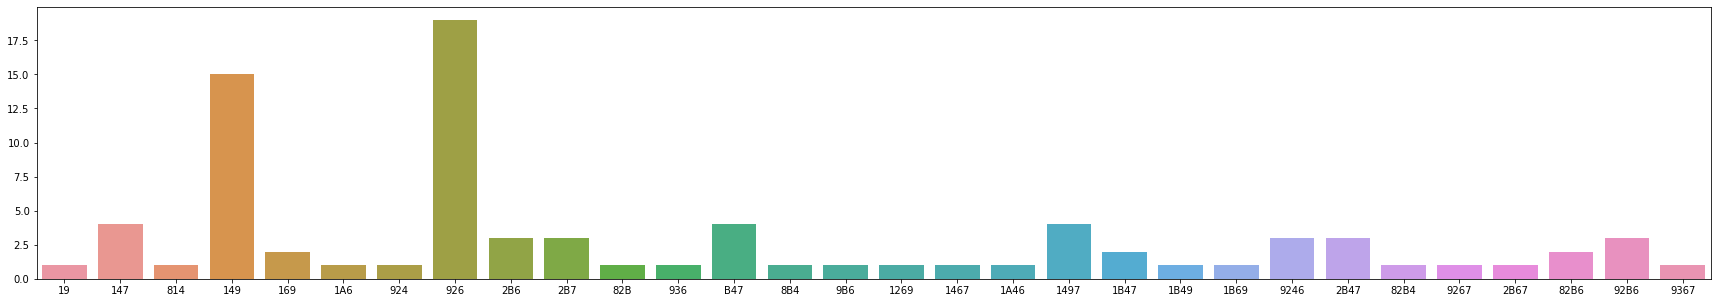

In [32]:
for index, row in df.iterrows():
    name = row['file']
    key = row['label']    
    sequence = row['chrombigram_sequence']
    sequence = sequence.split()
    print(name, key, sequence)
    counter = ChrombigramCounter()
    for chrombi_str in sequence:      
      chrombi = Chrombigram.from_string(chrombi_str)      
      counter.append(chrombi)    
    histogramdf = pd.Series(counter.chrombigram_dict)
    histogramdf = histogramdf.replace(0, np.nan)
    histogramdf = histogramdf.dropna()
    print(list(histogramdf.index))    
    plt.figure(figsize=(30, 5))
    sns.barplot(x=histogramdf.index, y=histogramdf.values)
    plt.show()
    break